# Estimate sample parameters to create BigFive cutpoints

This highly experimental notebook aims to estimate the cutpoints for the Open Personality Inventory. At the end, it will store a json file used by the VueJS component.

In [1]:
import pandas as pd
import seaborn as sns 
from pandas.io.json import json_normalize
import os

In [3]:
data = pd.read_json('../db/open-bigfive-ipip100-export.json')
data.head()

,ipip100
-LlnvcVn0ii9VTADDKpL,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."
-LlqA981UaUuE8LK2EAR,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."
-LlqAhDj2BLzX3d57eBJ,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."
-LlqEmnsaFdTtPvEElKN,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."
-LlqF-GXxQx6avvzIKi6,"[{'factor': 1, 'label': 'Eu sou a alma da fest..."


In [4]:
my_list = data['ipip100'].tolist()

In [5]:
subject = json_normalize(my_list[41])
subject['answer'] = pd.to_numeric(subject['value'])
subject.head()

,factor,label,reversed,value,answer
0,1,Eu sou a alma da festa.,True,4,4
1,2,Eu sou grosseiro(a) com as pessoas,False,4,4
2,3,Eu estou sempre pronto(a).,True,3,3
3,4,Eu me estresso facilmente.,False,0,0
4,5,Eu tenho um vocabulário rico.,True,0,0


In [6]:
subject.groupby(by='factor')[['answer']].sum()

,answer
factor,
1,4
2,4
3,3
4,0
5,0


In [7]:
results = []
factor_one, factor_two, factor_three, factor_four, factor_five = [], [], [], [], []
for i in range(len(my_list)):
    subject = json_normalize(my_list[i])
    subject['answer'] = pd.to_numeric(subject['value'])
    result = subject.groupby(by='factor')[['answer']].sum()
    results.append(result)

for i in range(len(results)):
    factor_one.append(results[i]['answer'][1])
    factor_two.append(results[i]['answer'][2])
    factor_three.append(results[i]['answer'][3])
    factor_four.append(results[i]['answer'][4])
    factor_five.append(results[i]['answer'][5])

In [8]:
data_dictionary = {'f_one': factor_one, 
                   'f_two': factor_two,
                   'f_three': factor_three,
                   'f_four': factor_four,
                   'f_five': factor_five}

df = pd.DataFrame(data_dictionary)
df.tail()

,f_one,f_two,f_three,f_four,f_five
329,30,52,87,64,87
330,74,88,71,91,73
331,51,74,69,29,80
332,87,91,85,71,75
333,78,89,78,54,78


In [9]:
df.describe()

,f_one,f_two,f_three,f_four,f_five
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,49.452096,61.865269,55.814371,46.122754,58.592814
std,27.448928,32.074095,30.081096,27.700997,29.860870
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,53.250000,49.000000,28.000000,53.250000
50%,57.000000,76.000000,65.000000,51.000000,70.000000
75%,70.000000,83.000000,77.750000,66.000000,79.000000
max,98.000000,99.000000,97.000000,96.000000,97.000000


In [10]:
# Filter out test cases
df = df[df.f_one > 20 ]
df.describe()

,f_one,f_two,f_three,f_four,f_five
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,61.191011,76.962547,69.520599,57.363296,72.617978
std,15.862101,12.050899,13.831782,18.085611,11.387738
min,23.000000,32.000000,26.000000,20.000000,35.000000
25%,50.500000,72.000000,59.000000,44.500000,65.000000
50%,62.000000,79.000000,70.000000,56.000000,73.000000
75%,72.500000,85.000000,80.000000,70.500000,81.000000
max,98.000000,99.000000,97.000000,96.000000,97.000000


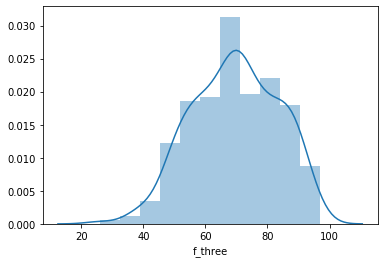

In [11]:
# Plotar Histogramas
sns.distplot(df['f_three'])

In [12]:
def half_sd(x):
    return { 'lower': round(x.mean() - x.std()/2, 1),
             'mean' : round(x.mean(),1),
             'upper': round(x.mean() + x.std()/2, 1)}

data_to_ipip100 = df[['f_one', 'f_two', 'f_three', 'f_four', 'f_five']].apply(half_sd)

In [13]:
data_to_ipip100.to_json(r'../src/assets/sample_features.json')

FileNotFoundError: [Errno 2] No such file or directory: 'src/assets/sample_features.json'

In [13]:
os.getcwd()

'/home/henrique/github_repos/personality-big-five-ipip100'